<a href="https://colab.research.google.com/github/LouizaA8/Financial-Data-Simulation-Exploratory-Analysis.ipynb/blob/main/Financial_Data_Simulation_%26_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

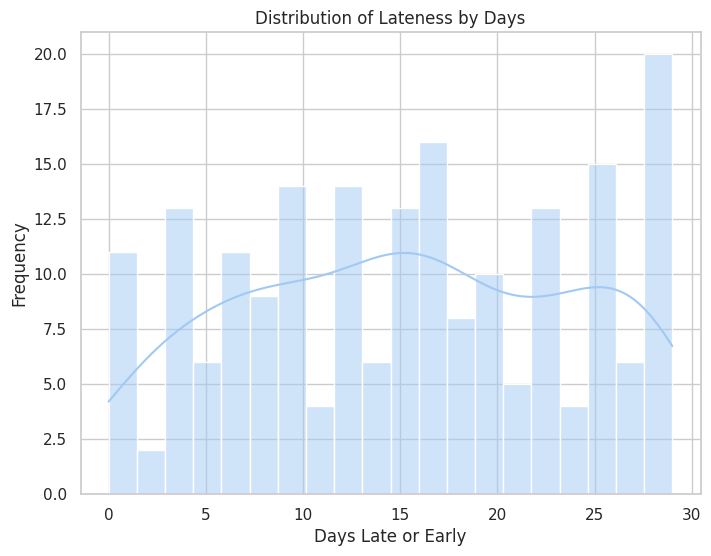

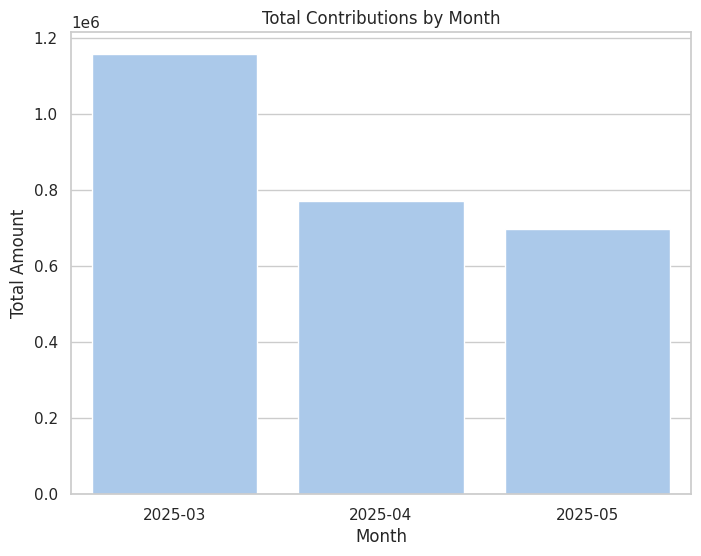

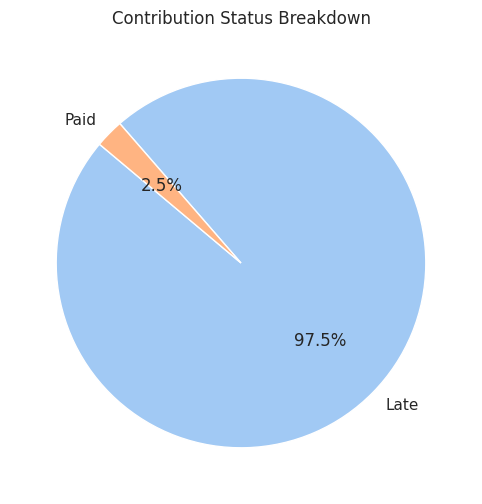

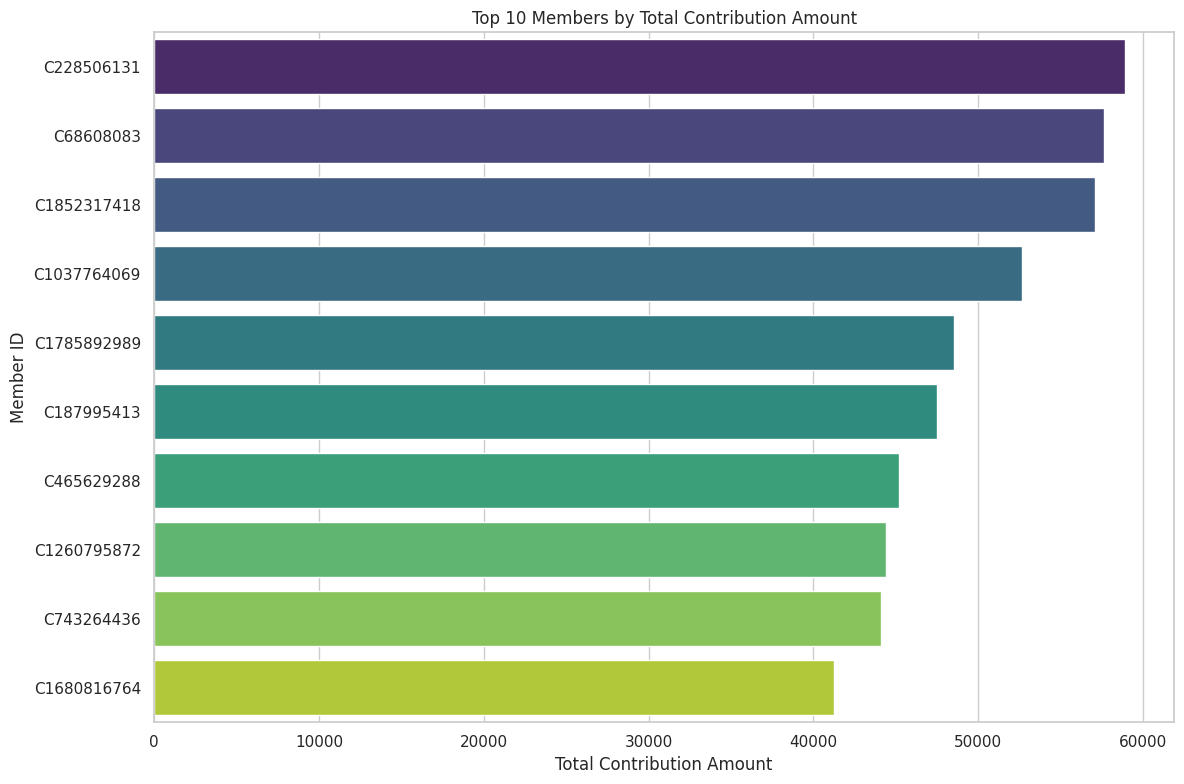

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', palette='pastel', context='notebook')
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head()

#Data cleaning and preparation
df = df[df['type'] == 'PAYMENT']

df = df.sample(n=200, random_state=42).reset_index(drop=True)

df = df.rename(columns={'nameOrig': 'Member_ID', 'amount': 'Amount'})

date_range = pd.date_range(start='2025-03-01', periods=90, freq='D')
df['Date'] = np.random.choice(date_range, size=len(df))

df['Due_Date'] = df['Date'].apply(lambda x: pd.Timestamp(year=x.year, month=x.month, day=1))

df['Lateness'] = (df['Date'] - df['Due_Date']).dt.days

df['Status'] = df['Lateness'].apply(lambda x: 'Paid' if x == 0 else ('Late' if x > 0 else 'Early'))

df = df[['Member_ID', 'Date', 'Amount', 'Due_Date', 'Lateness', 'Status']]
df.head()

#Exploration
# lateness of members
plt.figure(figsize=(8, 6))
sns.histplot(df['Lateness'], bins=20, kde=True)
plt.title("Distribution of Lateness by Days")
plt.xlabel("Days Late or Early")
plt.ylabel("Frequency")
plt.show()

#monthly contibutions
monthly_contributions = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum().reset_index()
monthly_contributions['Date'] = monthly_contributions['Date'].astype(str)
plt.figure(figsize=(8, 6))
sns.barplot(data=monthly_contributions, x='Date', y='Amount')
plt.title("Total Contributions by Month")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.show()

#Contribution Status Breakdown
df['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, figsize=(8, 6))
plt.title("Contribution Status Breakdown")
plt.ylabel('')
plt.show()

#Top 10 contributors
total_contributions = df.groupby('Member_ID')['Amount'].sum().reset_index()
total_contributions = total_contributions.sort_values(by='Amount', ascending=False)
top_contributors = total_contributions.head(10)
plt.figure(figsize=(8, 6))
sns.barplot(data=top_contributors,
            y='Member_ID',
            hue = 'Member_ID',
            x='Amount',
            palette='viridis',
            dodge = False,
            legend=False)

plt.title("Top 10 Members by Total Contribution Amount")
plt.xlabel("Total Contribution Amount")
plt.ylabel("Member ID")
plt.tight_layout()
plt.show()

df.to_csv("cleaned_chama_contributions.csv", index=False)

data_dict = {
    "Column": ["Member_ID", "Date", "Amount", "Due_Date", "Lateness", "Status"],
    "Description": [
        "ID of the chama member (from PaySim nameOrig)",
        "Date when the contribution was made",
        "Amount contributed",
        "Expected contribution date (1st of month)",
        "Number of days between payment and due date",
        "Contribution status (Paid, Late, Early)"
    ]
}
pd.DataFrame(data_dict).to_csv("data_dictionary.csv", index=False)




